In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def load_and_clean(path):
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip()
    for col in df.select_dtypes(include=["object"]).columns:
        df[col] = df[col].str.strip()
    df = df[df["epoch"] != "N/A"]
    df["epoch"] = df["epoch"].astype(int)
    numeric_cols = ["auc",
                    "c@1",
                    "f_05_u",
                    "F1",
                    "brier",
                    "overall",
                    "sub_overall"]
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col])
    return df


def plot_metric(df, metric, title):
    # Adapted from
    # https://www.skillcamper.com/lesson/seaborn-part-2
    sns.set(style="whitegrid")

    g = sns.FacetGrid(
        data=df,
        col="view",
        col_order=['DV-MA-k-300', 'DV-MA-k-3000', 'DV-MA-k-20000',
                   'undistorted'],
        height=4,
        aspect=1,
        sharex=True,
        sharey=False
    )

    def plot_view(data, **kwargs):
        plt.plot(data['epoch'], data[metric],
                 marker='o',
                 linestyle='-',
                 color='blue')

    g.map_dataframe(plot_view)

    g.fig.suptitle(title, fontsize=16, y=1.05)
    g.set_axis_labels("Epoch", metric)
    g.set(ylim=(0.54, 0.86))

    plt.tight_layout()

    fileified_title = (title.replace(' ', '_')
                            .replace('@', 'at')
                            .replace(':', '_')
                            .replace('.', '_')
                            .replace('_Evaluation_', '')
                            .lower())
    g.savefig('./' + fileified_title + '.png')

    return g

In [28]:
df_hedged = load_and_clean(
    '/Users/zacbolton/dev/BSc/FP/Log/valla_validation_all_eval_scores/hedged-valla_validation_undistorted_long.csv'
)
df_true = load_and_clean(
    '/Users/zacbolton/dev/BSc/FP/Log/valla_validation_all_eval_scores/true-valla_validation_undistorted_long.csv'
)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/zacbolton/dev/BSc/FP/Log/valla_validation_all_eval_scores/hedged-valla_validation_undistorted_long.csv'

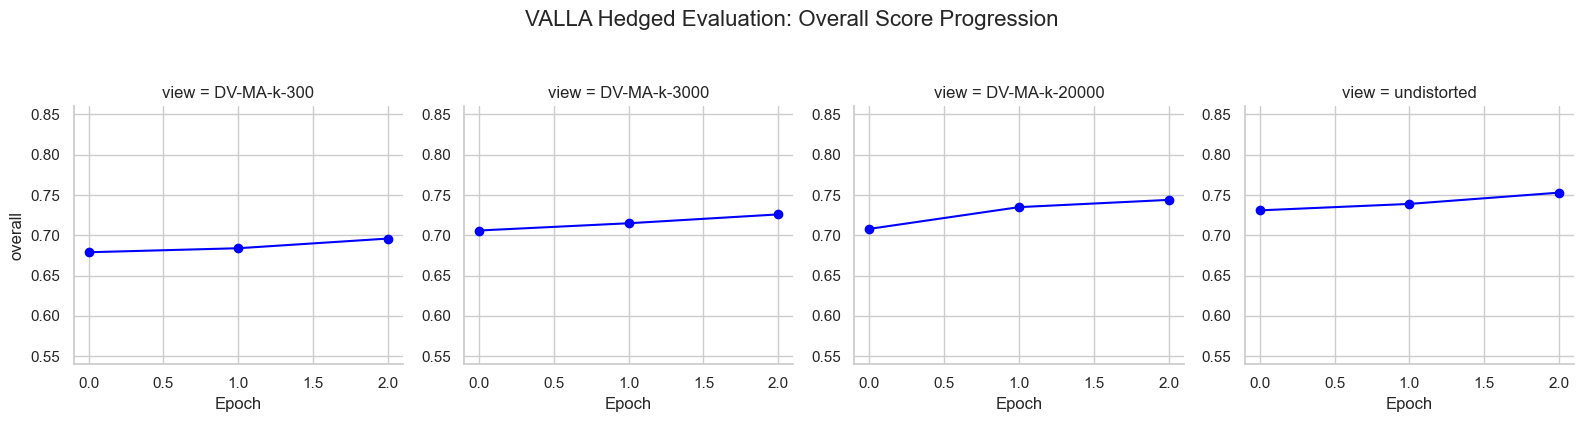

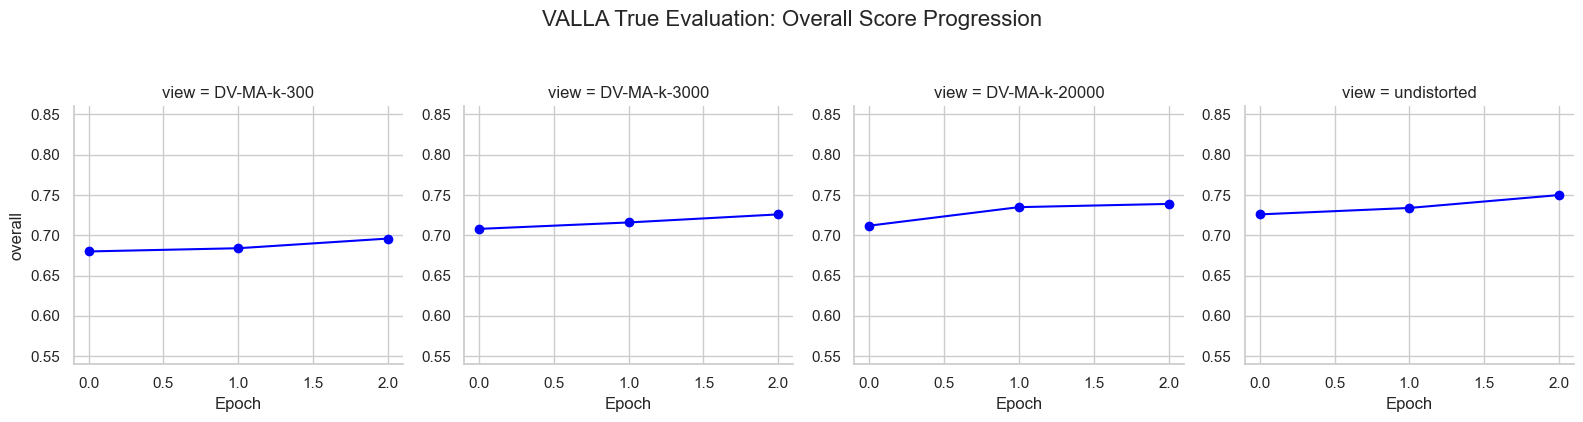

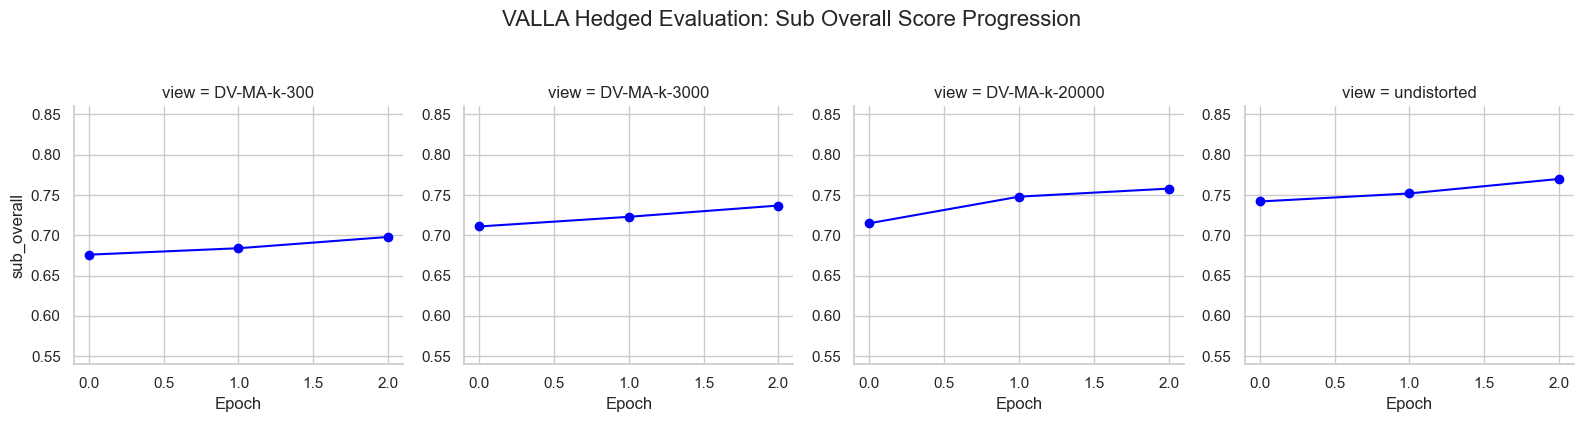

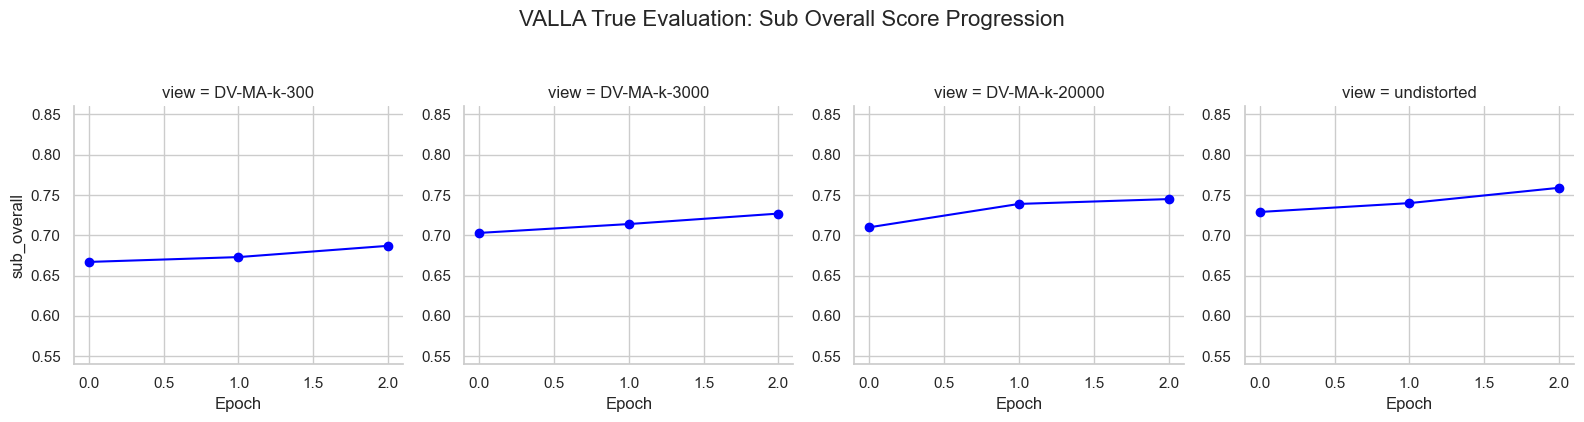

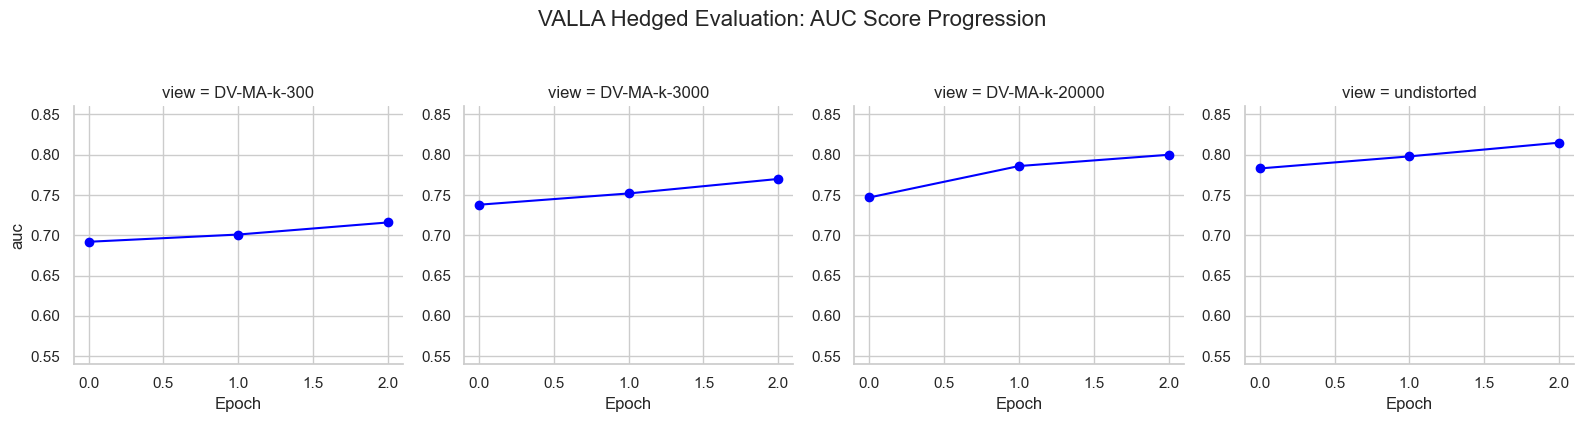

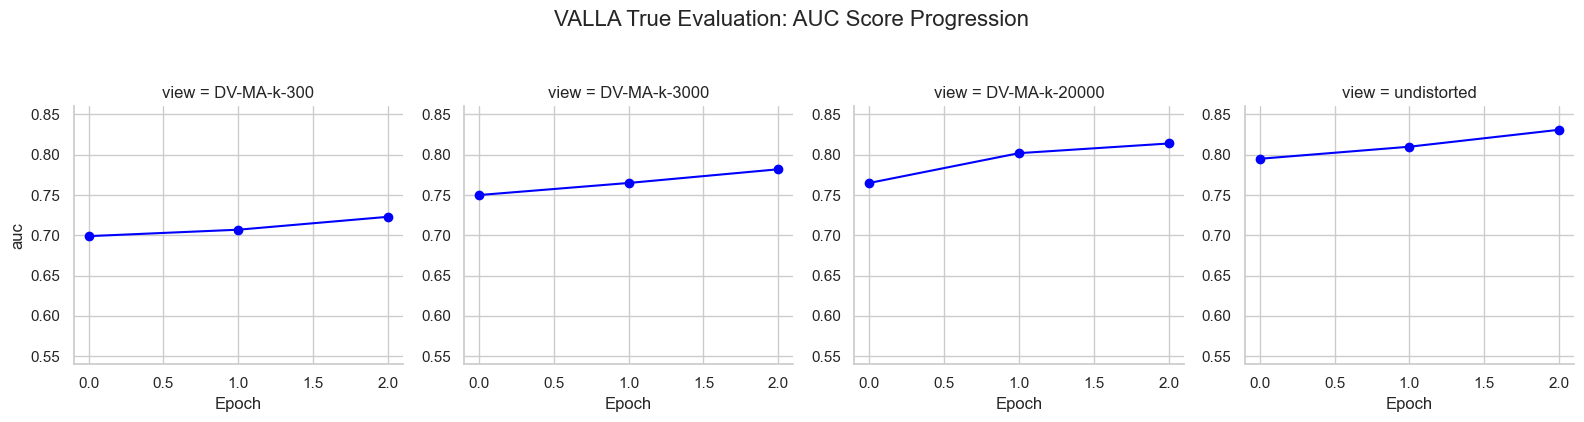

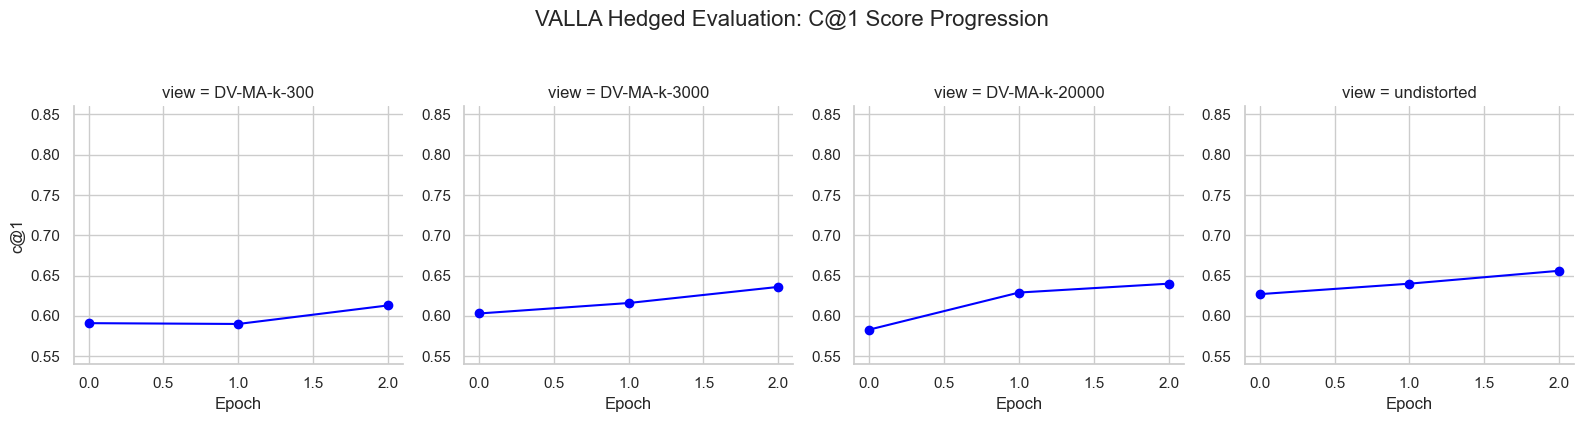

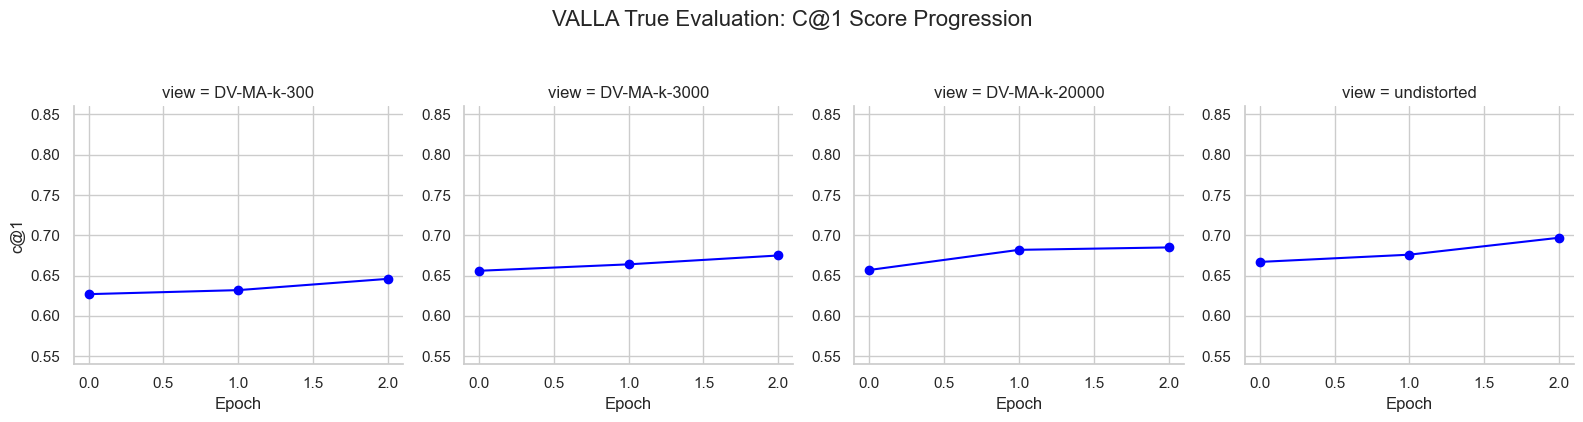

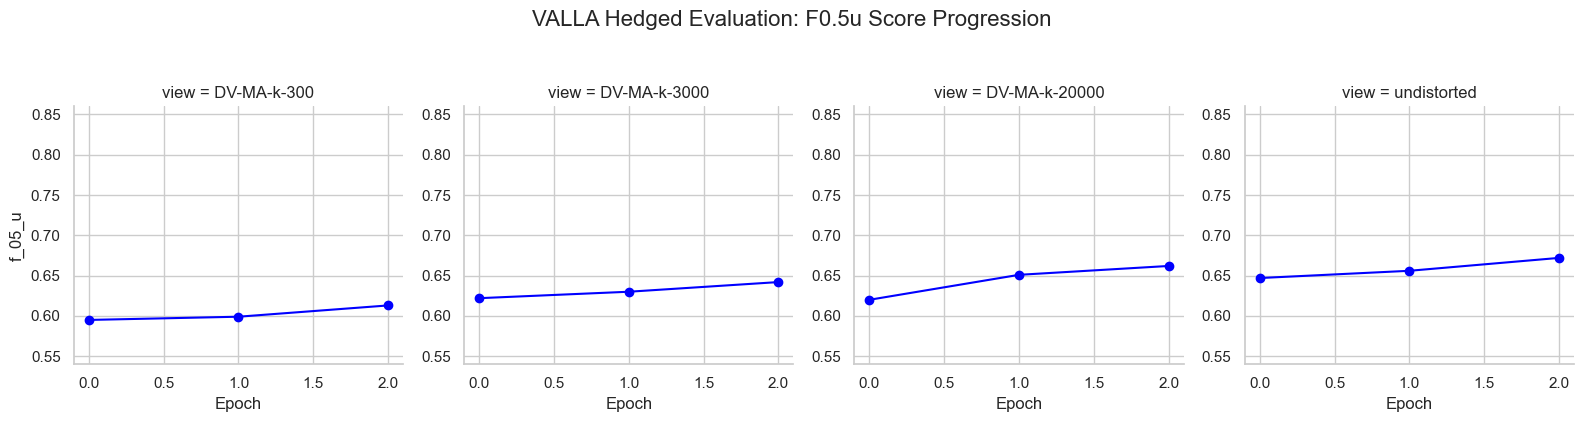

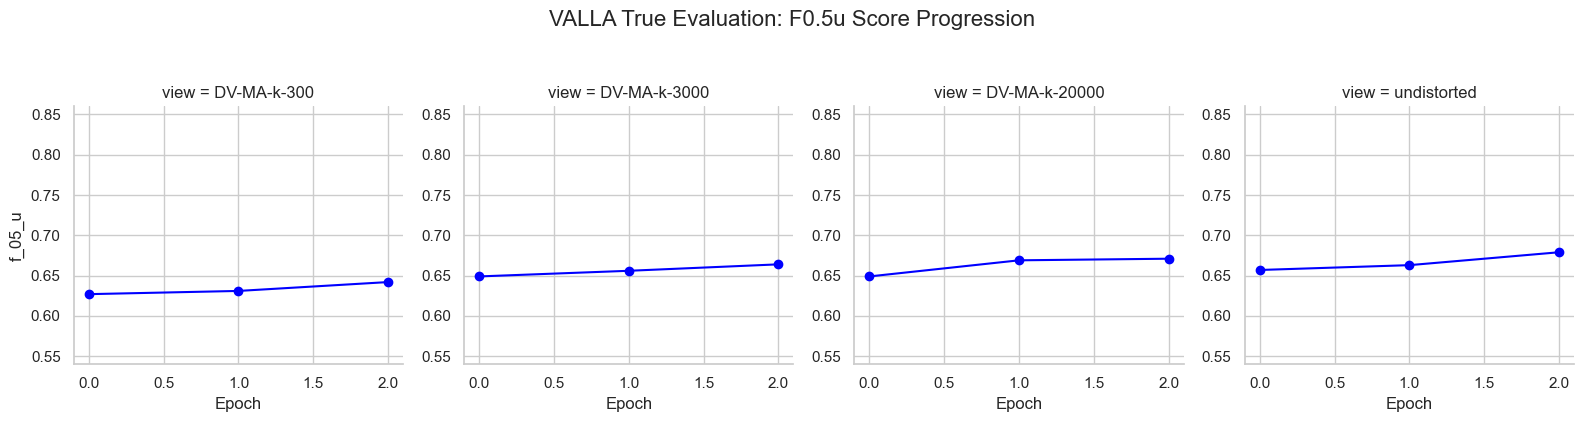

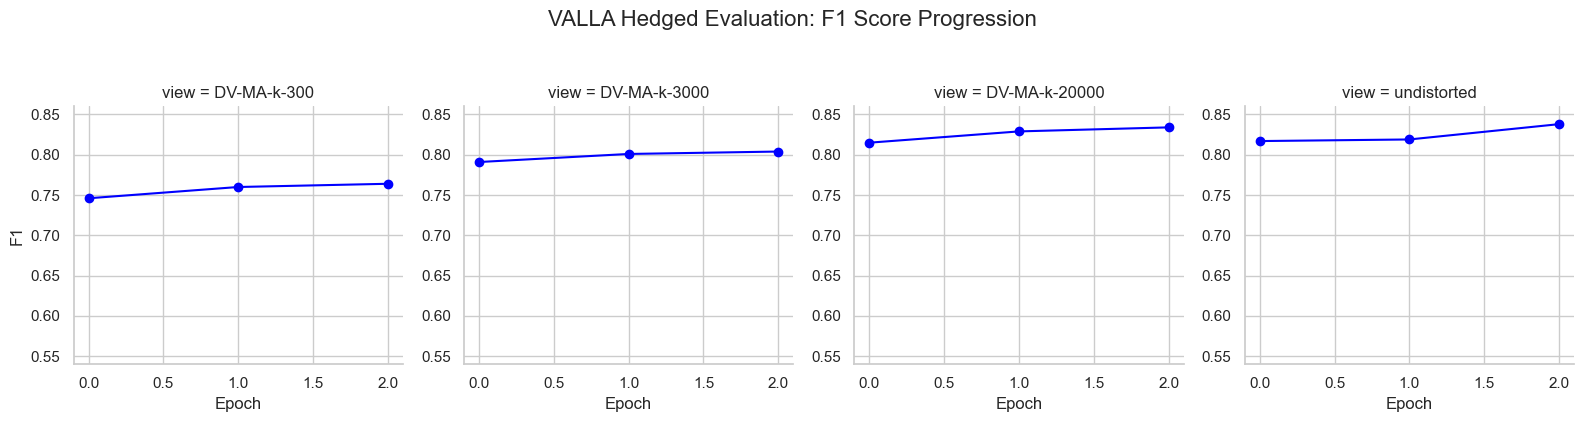

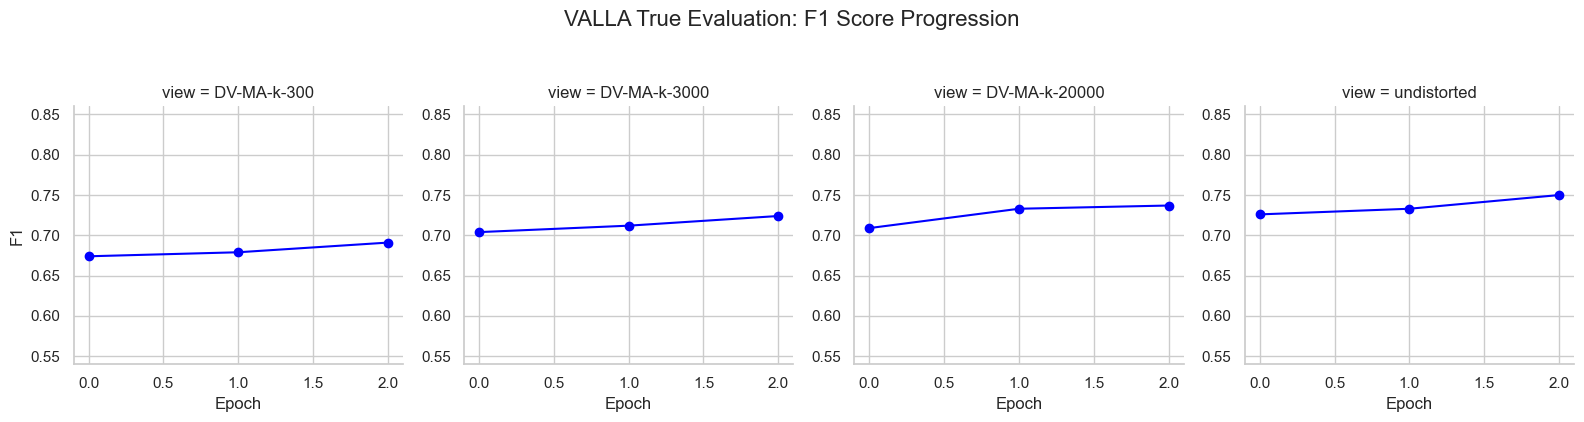

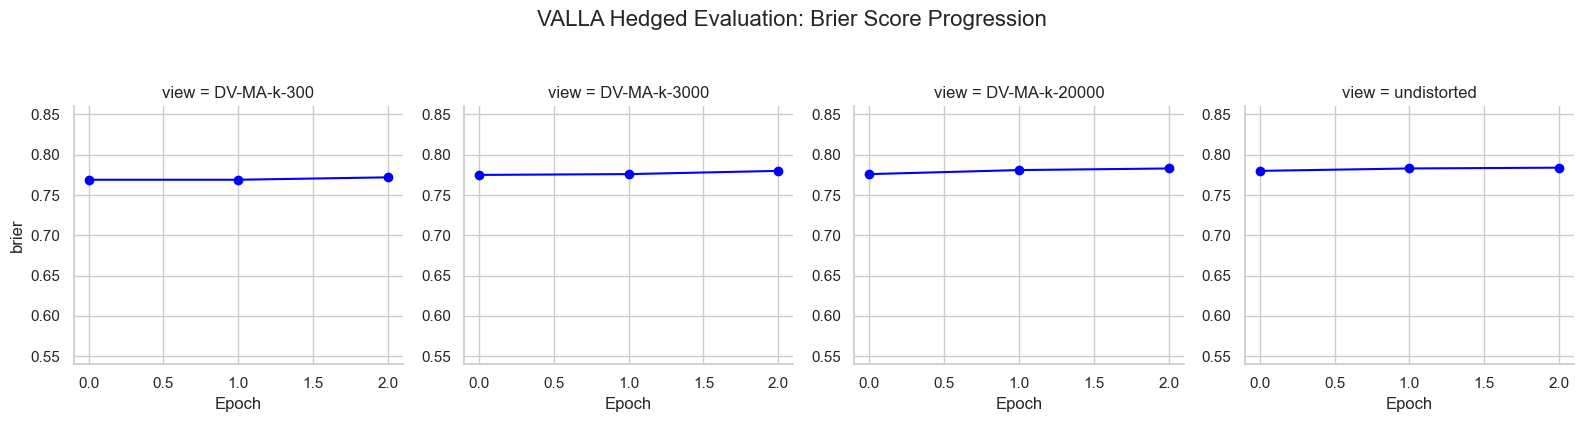

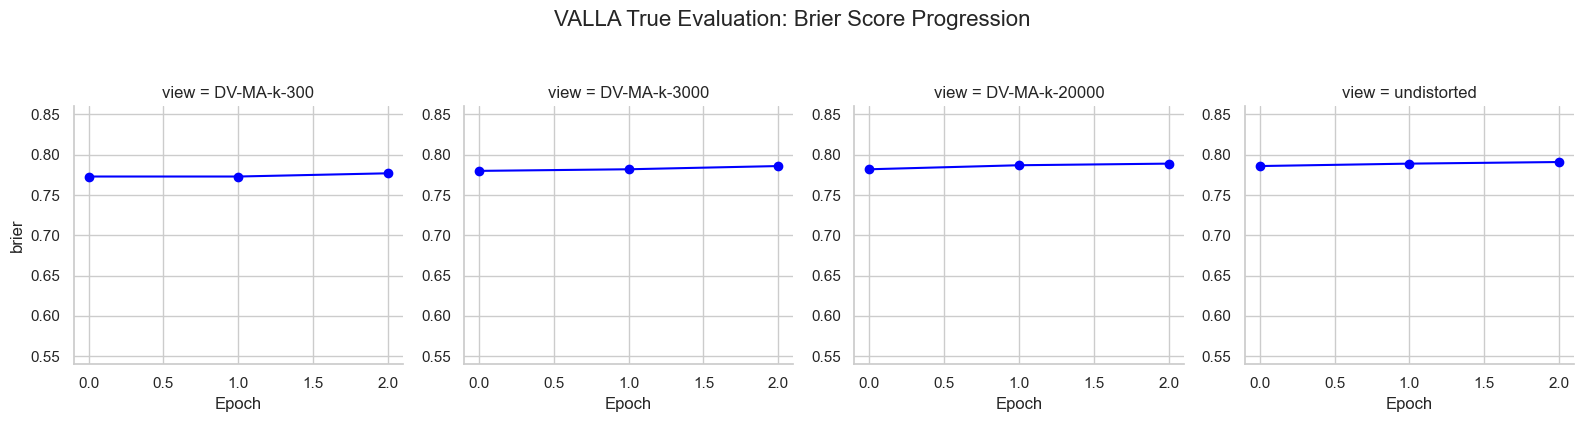

In [29]:
plot_metric(df_hedged, "overall", "VALLA Hedged Evaluation: Overall Score Progression")
plot_metric(df_true, "overall", "VALLA True Evaluation: Overall Score Progression")

plot_metric(df_hedged, "sub_overall", "VALLA Hedged Evaluation: Sub Overall Score Progression")
plot_metric(df_true, "sub_overall", "VALLA True Evaluation: Sub Overall Score Progression")

plot_metric(df_hedged, "auc", "VALLA Hedged Evaluation: AUC Score Progression")
plot_metric(df_true, "auc", "VALLA True Evaluation: AUC Score Progression")

plot_metric(df_hedged, "c@1", "VALLA Hedged Evaluation: C@1 Score Progression")
plot_metric(df_true, "c@1", "VALLA True Evaluation: C@1 Score Progression")

plot_metric(df_hedged, "f_05_u", "VALLA Hedged Evaluation: F0.5u Score Progression")
plot_metric(df_true, "f_05_u", "VALLA True Evaluation: F0.5u Score Progression")

plot_metric(df_hedged, "F1", "VALLA Hedged Evaluation: F1 Score Progression")
plot_metric(df_true, "F1", "VALLA True Evaluation: F1 Score Progression")

plot_metric(df_hedged, "brier", "VALLA Hedged Evaluation: Brier Score Progression")
plot_metric(df_true, "brier", "VALLA True Evaluation: Brier Score Progression")